<a href="https://colab.research.google.com/github/dilia-w/Visao-Computacional/blob/main/14_Usando_a_image_de_um_circulo_como_filtro_passa_alta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

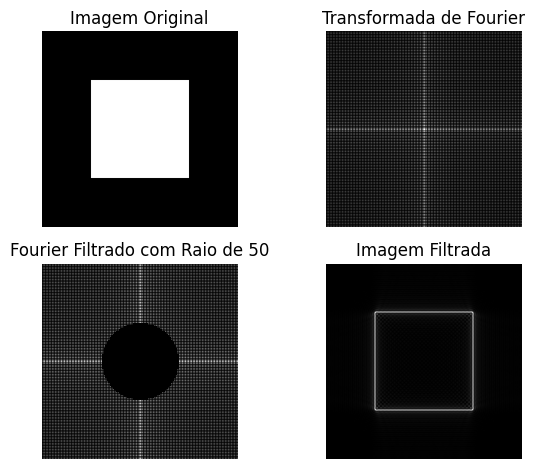

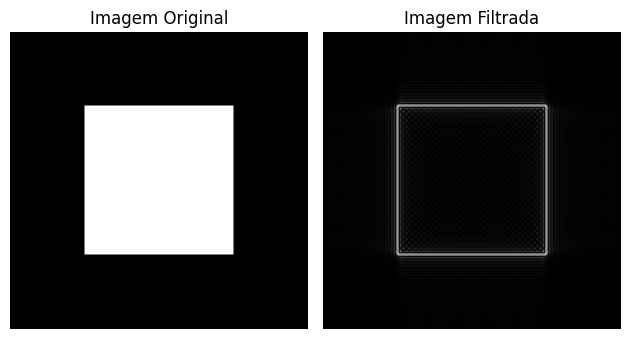

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2

# Criando uma matriz de zeros
image = np.zeros((256, 256), dtype=np.uint8)

# Indicando um intervalo de Pixels
x1, y1 = 64, 64
x2, y2 = 192, 192

# Convertendo o intervalo de valores da matriz de 0 para 255
image[y1:y2, x1:x2] = 255

# Calculando a transformada de Fourier da imagem (FFT 2D)
transformada = fftshift(fft2(image))

# Criando uma imagem de círculo para ser usada como filtro
filter_size = image.shape
center = (filter_size[0] // 2, filter_size[1] // 2)
radius = 50
filter = np.zeros(filter_size)
filter = cv2.circle(filter, center, radius, 1, -1)
filter_bool = filter.copy().astype(bool)

transformada_filtrada = transformada * ~(filter_bool)
image_inverse = ifft2(transformada_filtrada)
image_inverse = np.abs(image_inverse)

# Apresentando a imagem, transformada de Fourier e o resultado do filtro
plt.figure()

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(np.log(1 + np.abs(transformada)), cmap='gray')
plt.title('Transformada de Fourier')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log(1 + np.abs(transformada_filtrada)), cmap='gray')
plt.title('Fourier Filtrado com Raio de ' + str(radius))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_inverse, cmap='gray')
plt.title('Imagem Filtrada')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_inverse, cmap='gray')
plt.title('Imagem Filtrada')
plt.axis('off')

plt.tight_layout()
plt.show()
